<a href="https://colab.research.google.com/github/git-to-aswin/ML-Model-Building/blob/main/Models/Linear_Regression/salary_experience_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary vs Experience - Linear Regression Model

In this notebook, we will understand the basic visualisation of the model and run a simple linear regression model with numpy.

**NOTE:** We are not going to datasplit or perform anyother operation. It is purely an implementation code.

## Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load dataset

In [3]:
url = "https://raw.githubusercontent.com/git-to-aswin/ML-Model-Building/refs/heads/main/dataset/Salary_Data.csv"
df = pd.read_csv(url)

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Visualise Feature

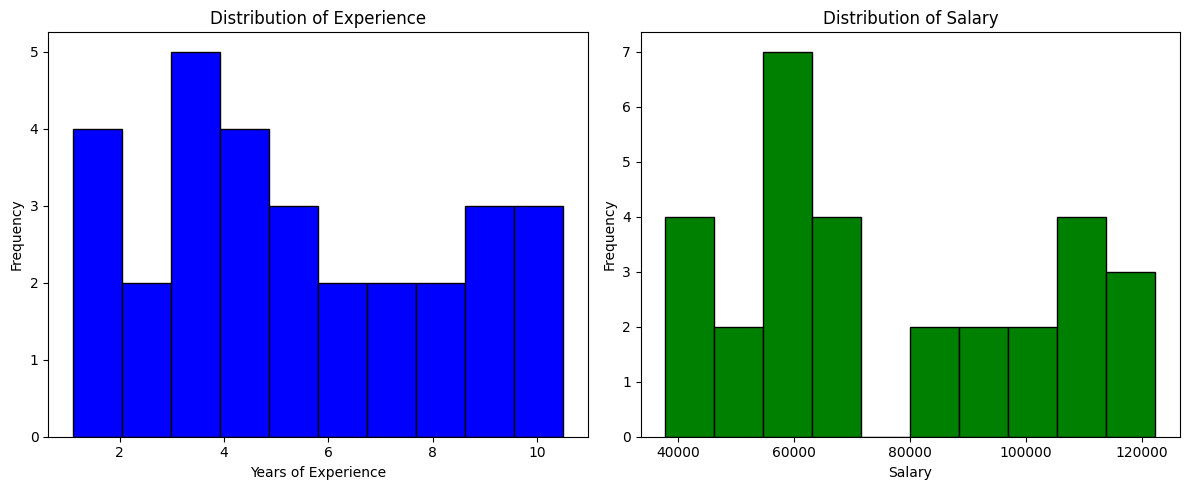

In [40]:
# Plot feature distribution
plt.figure(figsize=(12,5))  # Create one figure

# Plot 1
plt.subplot(1, 2, 1)
plt.hist(df['YearsExperience'], color='blue', edgecolor='black')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Experience')

# Plot 2
plt.subplot(1, 2, 2)
plt.hist(df['Salary'], color='green', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')

plt.tight_layout()   # Adjust spacing so plots don't overlap
plt.show()

From the observation, the value is little bit skewed. We apply **Normalisation** to supress the skew values.

**Tip:** If the skew is more, then we should have used **Transformation**.

## Normalisation

We are using Z-score normalisation, where we use mean and std to normalize the value.

In [41]:
## z-score Normalisation
X = df["YearsExperience"].values
y = df["Salary"].values

X_mean = X.mean()
X_std = X.std()
X_norm = (X - X_mean) / X_std

y_mean = y.mean()
y_std = y.std()
y_norm = (y - y_mean) / y_std

## Apply Gradient Descent

[Formula derivation](https://www.notion.so/Linear-Regression-2a7207b34a81810fabd9c3a06fed466e?v=2a7207b34a8180cbb926000c0020eb2d)


In [42]:
def gradient_descent(X, y, m = 0, b = 0, lr = 0.01, epochs = 1000):
  losses = []
  m_values = []
  b_values = []
  n = len(X)

  for epoch in range(epochs):
      y_pred = m * X + b

      # gradients
      dm = (-2/n) * np.sum(X * (y - y_pred))
      db = (-2/n) * np.sum(y - y_pred)

      # update
      m -= lr * dm
      b -= lr * db

      # save parameters every 50 epochs
      if epoch % 50 == 0:
          m_values.append(m)
          b_values.append(b)

      # track loss
      loss = np.mean((y - y_pred)**2)
      losses.append(loss)

  return {
      "m": m,
      "b": b,
      "losses": losses,
      "m_values": m_values,
      "b_values": b_values
  }

## Loss Function

In [43]:
def loss_fn(losses):
  plt.figure(figsize=(8,5))
  plt.plot(losses, color="blue")
  plt.xlabel("Epoch")
  plt.ylabel("MSE Loss")
  plt.title("Gradient Descent Loss Curve")
  plt.grid(True)
  plt.show()

## Gradient Movement

In [44]:
# Convert normalized X back for plotting
def plot_gradient_movement(X, y, m_values, b_values):
  X_sorted = np.sort(X)

  plt.figure(figsize=(10,5))

  # Plot the data points
  plt.scatter(X, y, color="blue")

  # Plot regression lines over iterations
  for i in range(len(m_values)):
      y_line = m_values[i] * X_sorted + b_values[i]
      plt.plot(X_sorted, y_line, alpha=0.3, label=f"Epoch {i*50}")

  plt.title("Gradient Descent Line Movement")
  plt.xlabel("Normalized Experience")
  plt.ylabel("Normalized Salary")
  plt.legend()
  plt.show()

## Predictions

In [59]:
class LinearRegression:

  def __init__(self,X, y):
    self.param = gradient_descent(X,y)
    self.m = self.param["m"]
    self.b = self.param["b"]

  def analysis(self):
    loss_fn(self.param["losses"])
    plot_gradient_movement(X, y, self.param["m_values"], self.param["b_values"])

  def predict_salary_norm(self, exp):
      exp_norm = (exp - X_mean) / X_std
      salary_norm = self.m * exp_norm + self.b
      salary = salary_norm * y_std + y_mean
      return round(salary,2)

  def predict_salary(self, exp):
      salary = self.m * exp + self.b
      return round(salary,2)

## Baseline Model

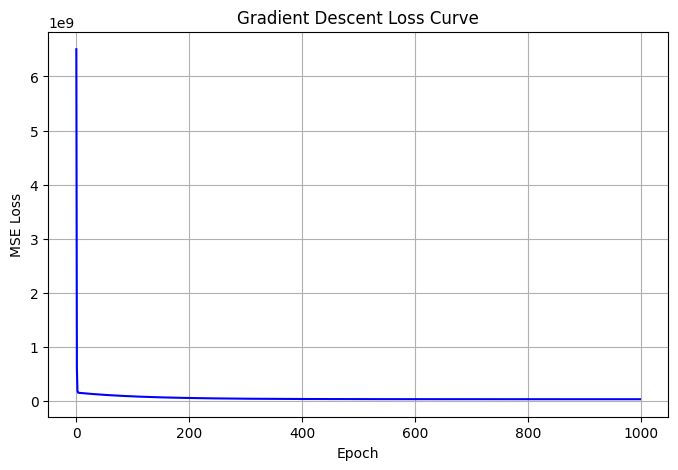

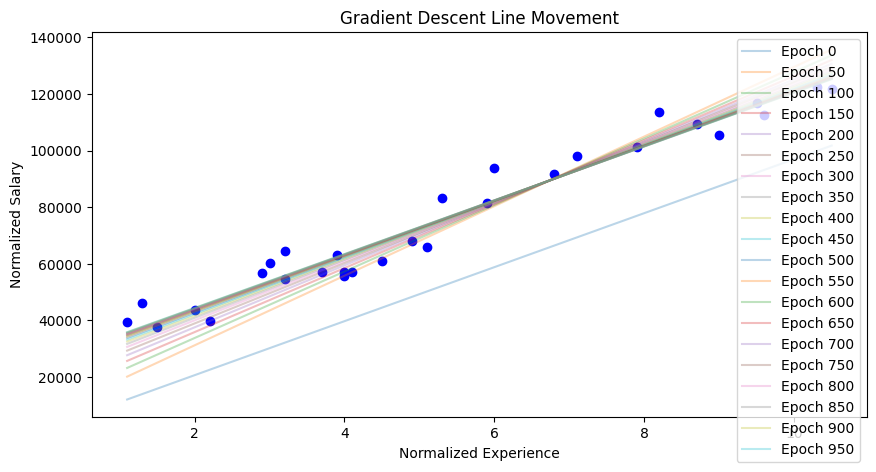

In [60]:
# Build Model
base = LinearRegression(X,y)
base.analysis()

In [61]:
base.predict_salary(1.5)

np.float64(39699.7)

## Normalisation

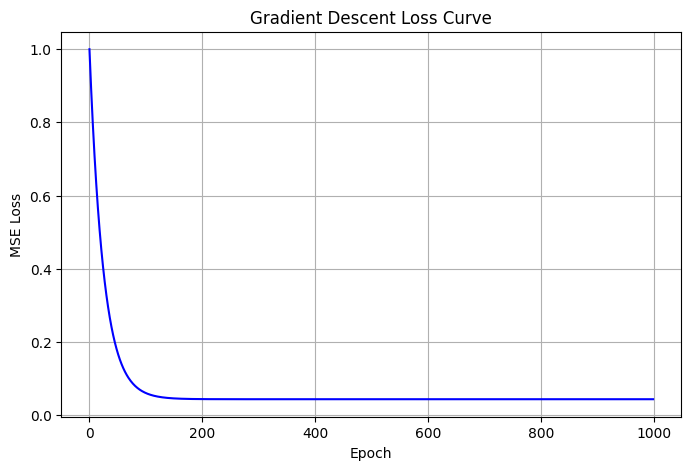

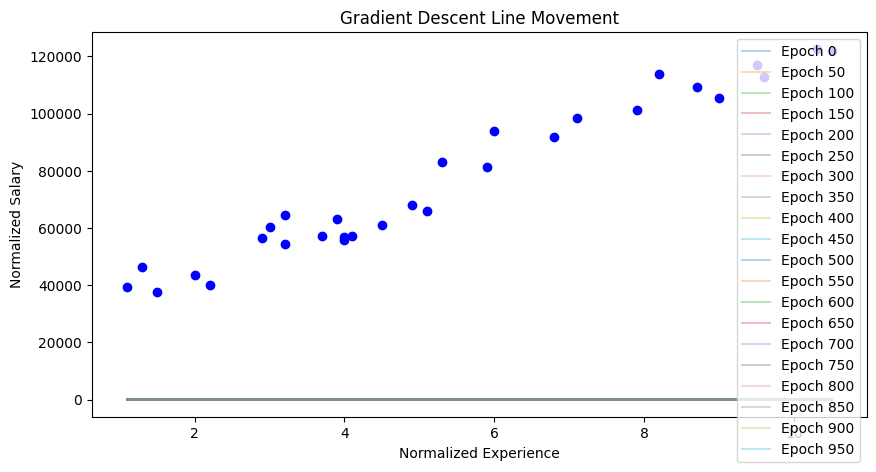

In [63]:
norm_model = LinearRegression(X_norm,y_norm)
norm_model.analysis()

In [64]:
norm_model.predict_salary_norm(1.5)

np.float64(39967.14)